<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2024/blob/main/SVM_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

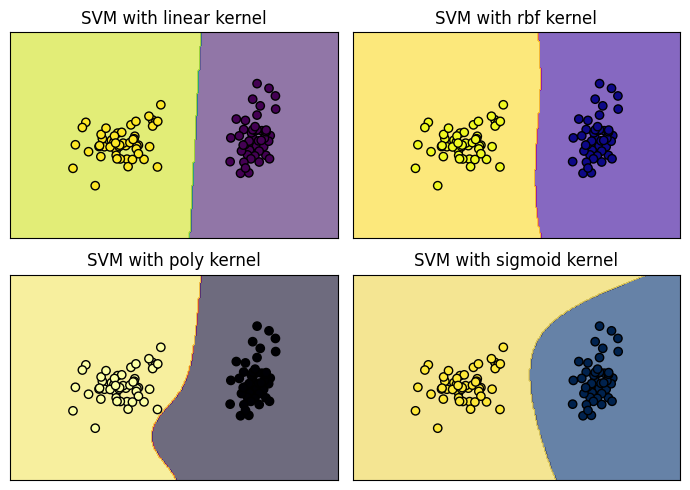

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Generate synthetic 2D data
X, y = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_informative=2,
    random_state=1, n_clusters_per_class=1
)

# Define SVM kernels and colormaps
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
colormaps = ['viridis', 'plasma', 'inferno', 'cividis']

# Create a mesh grid for plotting decision boundaries
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot settings
fig, axes = plt.subplots(2, 2, figsize=(7,5))
axes = axes.flatten()

for i, (kernel, cmap) in enumerate(zip(kernels, colormaps)):
    model = svm.SVC(kernel=kernel, gamma='auto')
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, alpha=0.6, cmap=cmap)
    scatter = axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
    axes[i].set_title(f"SVM with {kernel} kernel")
    axes[i].set_xlim(xx.min(), xx.max())
    axes[i].set_ylim(yy.min(), yy.max())
    axes[i].set_xticks(())
    axes[i].set_yticks(())

plt.tight_layout()
plt.savefig("svm_kernels_colored.png", dpi=300)
plt.show()
